In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
df=pd.read_csv('https://raw.githubusercontent.com/cindydkurniaty/PYTN_Prakerja_Cindy-Dwi_Kurniaty_Yusuf/main/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


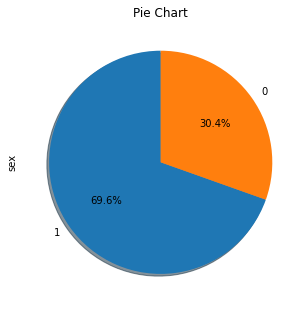

In [75]:
df['sex'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel sex')
plt.show()

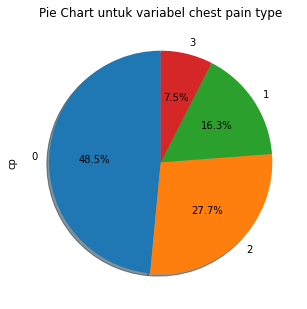

In [76]:
df['cp'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel chest pain type')
plt.show()

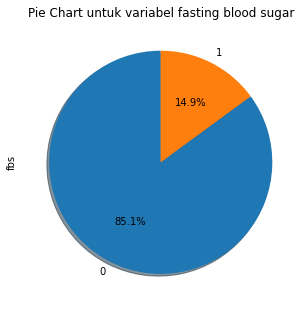

In [77]:
df['fbs'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel fasting blood sugar')
plt.show()

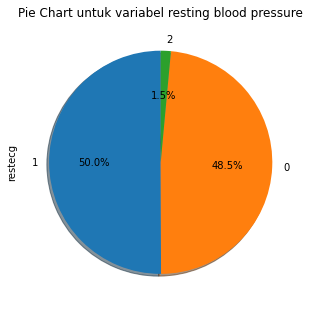

In [78]:
df['restecg'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel resting blood pressure')
plt.show()

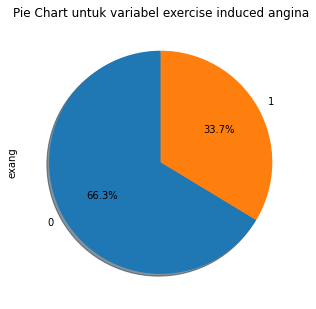

In [79]:
df['exang'].value_counts().plot(kind='pie', 
                              figsize=(5, 6), 
                              autopct='%1.1f%%',     
                              startangle=90,     
                              shadow=True)
plt.title('Pie Chart untuk variabel exercise induced angina')
plt.show()

In [83]:
kategori=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[kategori] = df[kategori].astype(object)
print(df)
df.select_dtypes(exclude='object').describe()

      age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope ca  \
0      52   1  0       125   212   0       1      168     0      1.0     2  2   
1      53   1  0       140   203   1       0      155     1      3.1     0  0   
2      70   1  0       145   174   0       1      125     1      2.6     0  0   
3      61   1  0       148   203   0       1      161     0      0.0     2  1   
4      62   0  0       138   294   1       1      106     0      1.9     1  3   
...   ...  .. ..       ...   ...  ..     ...      ...   ...      ...   ... ..   
1020   59   1  1       140   221   0       1      164     1      0.0     2  0   
1021   60   1  0       125   258   0       0      141     1      2.8     1  1   
1022   47   1  0       110   275   0       0      118     1      1.0     1  1   
1023   50   0  0       110   254   0       0      159     0      0.0     2  0   
1024   54   1  0       120   188   0       1      113     0      1.4     1  1   

     thal  target  
0      

,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


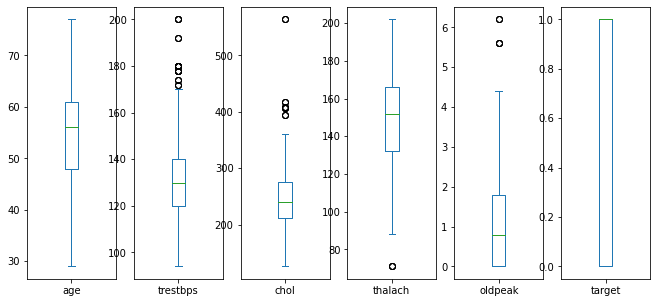

In [48]:
df.select_dtypes(exclude='object').plot(kind='box',subplots=True,layout=(1,8),sharex=False, figsize=(15,5))
plt.show()

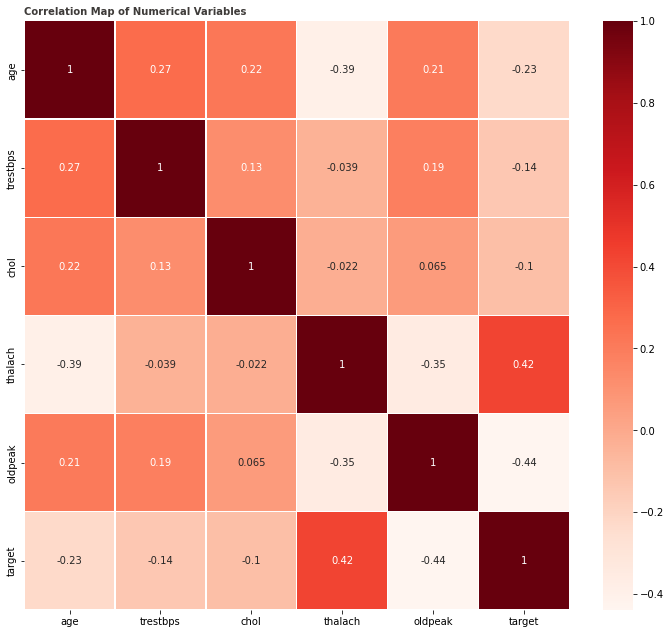

In [91]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='Reds', linewidths=0.2)
plt.title('Correlation Map of Numerical Variables', fontweight='heavy',
          fontsize='10', fontfamily='sans-serif', loc='left', color='#3E3B39')
plt.tight_layout(rect=[0, 0.02, 1, 1.01])

In [93]:
x = df.drop(['target'], axis=1)
y = df['target']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

In [103]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [106]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [107]:
x_test = scaler.transform(x_test)

In [108]:
y_pred = model.predict(x_test)

In [109]:
model.score(x_test, y_test)

0.8640776699029126